# Importing Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score   
import os
import tensorflow as tf
import seaborn as sns

# Working with Dataset

## Loading the dataset

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Visualise the shape of the dataset

In [3]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_train_full.shape

(60000, 28, 28)

There are 60,000 records of the images which are 28/28 pixels.

## Split the data 

We split the data in train, valid and test set.

We scale the data to help it converge better. 
Every value will range from 0-255 because it's of uni8 datatype. So, we scale it to 0-1 by dividing it from 1. 

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

## Visualise the dataset

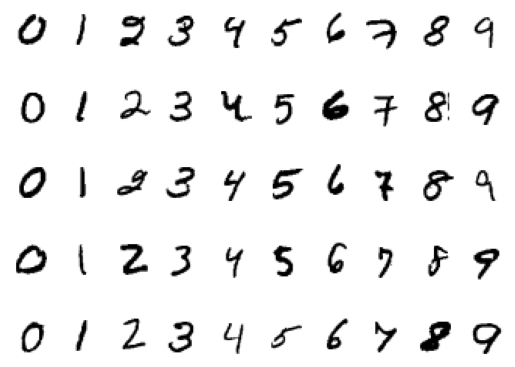

In [6]:
fig, ax = plt.subplots(5, 10)
 
for i in range(5):
    for j in range(10):
        ax[i][j].imshow(X_train[np.where(y_train == j)[0][i]], cmap='binary')
        ax[i,j].axis('off')

Visualise 5 different values of 10 different class. 

## Visualise  the heatmap of the image

<Axes: >

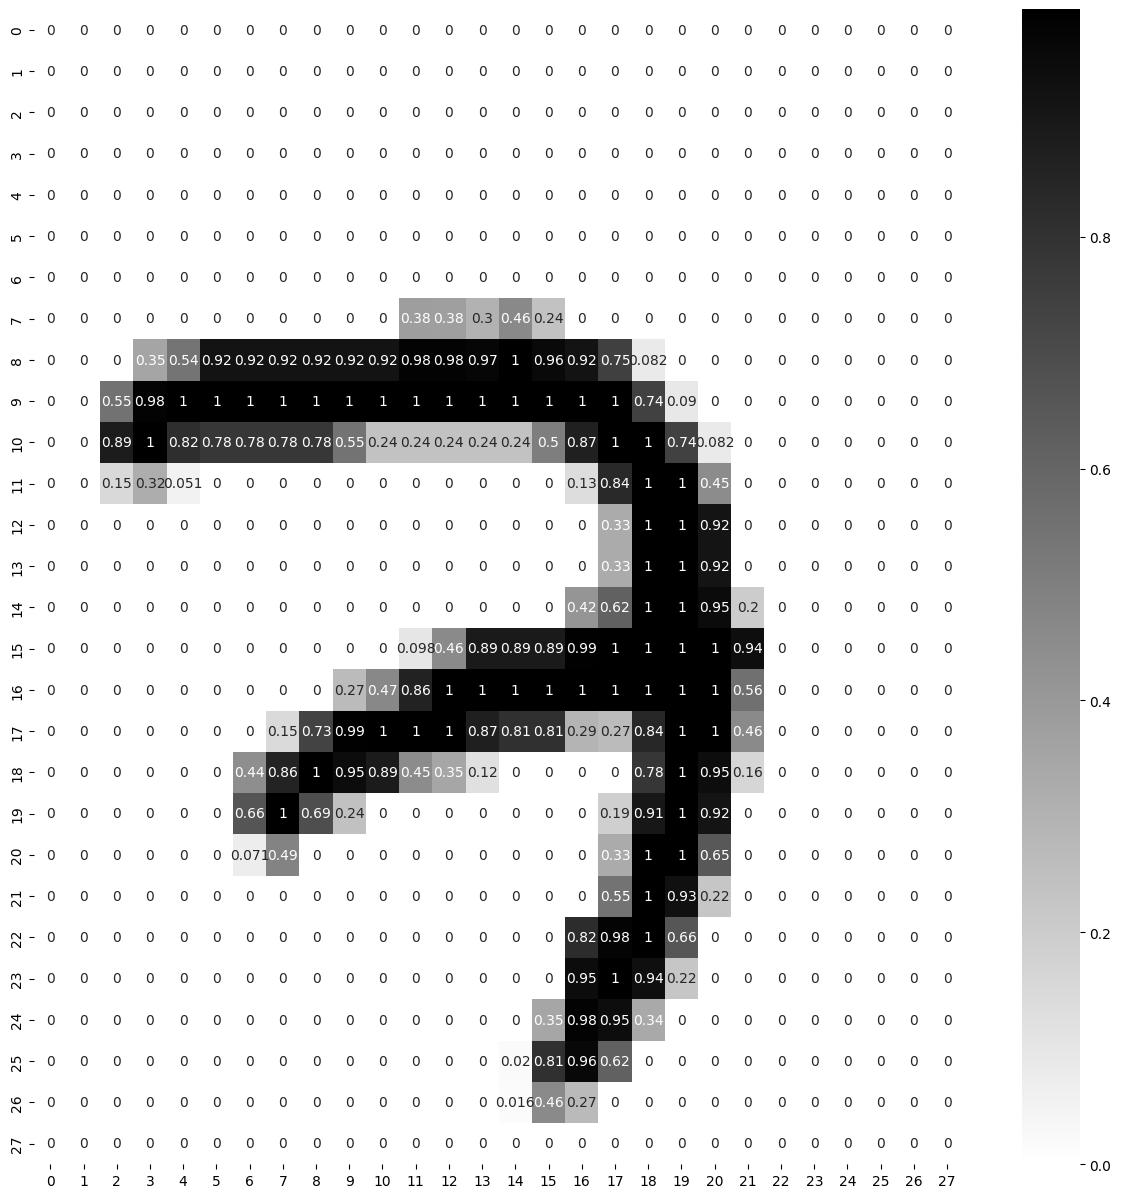

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

Here, as you can see that value is ranging from 0-1, the darker it is the closer it is to 1, there are 28 by 28 pixels and at different point the it have the value and that creates a pattern.

# Building the model

In [8]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

Defining a sequantial model with 2 hidden layers and define 10 different neurons for output layers because of 10 class.

In [9]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Get the summary of the model.

# Training the Model

In [11]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [16]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3919 - accuracy: 0.8940 - val_loss: 0.2864 - val_accuracy: 0.9240
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2716 - accuracy: 0.9231 - val_loss: 0.2300 - val_accuracy: 0.9376
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2244 - accuracy: 0.9362 - val_loss: 0.1976 - val_accuracy: 0.9456
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1910 - accuracy: 0.9454 - val_loss: 0.1718 - val_accuracy: 0.9528
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1666 - accuracy: 0.9527 - val_loss: 0.1520 - val_accuracy: 0.9590
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1475 - accuracy: 0.9577 - val_loss: 0.1430 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1320 - accuracy: 0.9621 - val_loss: 0.1312 - val_accuracy

In [19]:
y_pred = model_clf.predict(X_test)
y_pred = y_pred.round(2)

y_pred = np.argmax(y_pred, axis = -1)

313/313 [==============================] - 3s 9ms/step


## Check the Accuracy

In [32]:
score = accuracy_score(y_test, y_pred)  
score

0.9794

# Visualise the result

Here, we take 5 different records from the test case and visualise it by ploting the picture, printing the prediction and printing the actual one of it with the plotted test case.

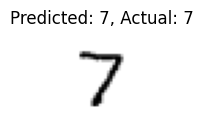

------------------------------------------------------------


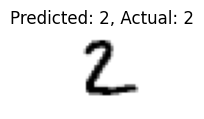

------------------------------------------------------------


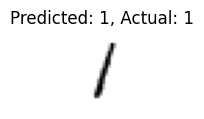

------------------------------------------------------------


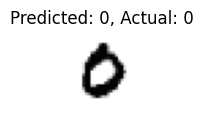

------------------------------------------------------------


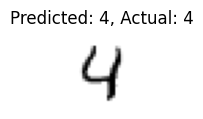

------------------------------------------------------------


In [29]:
X_new = X_test[:5]
y_pred_new = y_pred[:5]
y_test_new = y_test[:5]

plt.rcParams["figure.figsize"] = (1,1)

for data, pred, actual in zip(X_new, y_pred_new, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)